Import package

In [2]:
import cv2
from matplotlib import pyplot as plt
from math import sqrt
import numpy as np

Load image

In [3]:
img_x = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)
img_y = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)

img_y = img_y*0.5 + 255.5*0.5
img_y = np.uint8(img_y)
print(img_x)
print(img_y)

[[162 162 162 ... 171 167 142]
 [162 162 162 ... 171 167 142]
 [162 162 162 ... 171 166 142]
 ...
 [ 51  49  51 ...  93  97  94]
 [ 44  47  51 ...  99 102 101]
 [ 44  51  53 ... 103 104 107]]
[[208 208 208 ... 213 211 198]
 [208 208 208 ... 213 211 198]
 [208 208 208 ... 213 210 198]
 ...
 [153 152 153 ... 174 176 174]
 [149 151 153 ... 177 178 178]
 [149 153 154 ... 179 179 181]]


SSIM

In [4]:
M, N = img_x.shape
L = 255
c1 = 1/sqrt(L)
c2 = 1/sqrt(L)

mu_x = img_x.mean(axis=0).mean(axis=0)
mu_y = img_y.mean(axis=0).mean(axis=0)


sig_x = np.sum(np.power(img_x - mu_x, 2)) * (1/(M*N))
sig_y = np.sum(np.power(img_y - mu_y, 2)) * (1/(M*N))
sig_xy = np.sum((img_x - mu_x) * (img_y - mu_y)) * (1/(M*N))


ssim = (2*mu_x*mu_y + (c1*L)**2) * \
       (2*sig_xy    + (c2*L)**2) * \
       (mu_x**2 + mu_y**2 + (c1*L)**2)**-1 * \
       (sig_x   + sig_y   + (c2*L)**2)**-1

print(f"SSIM = {ssim}")

SSIM = 0.7494340923996867


Figure

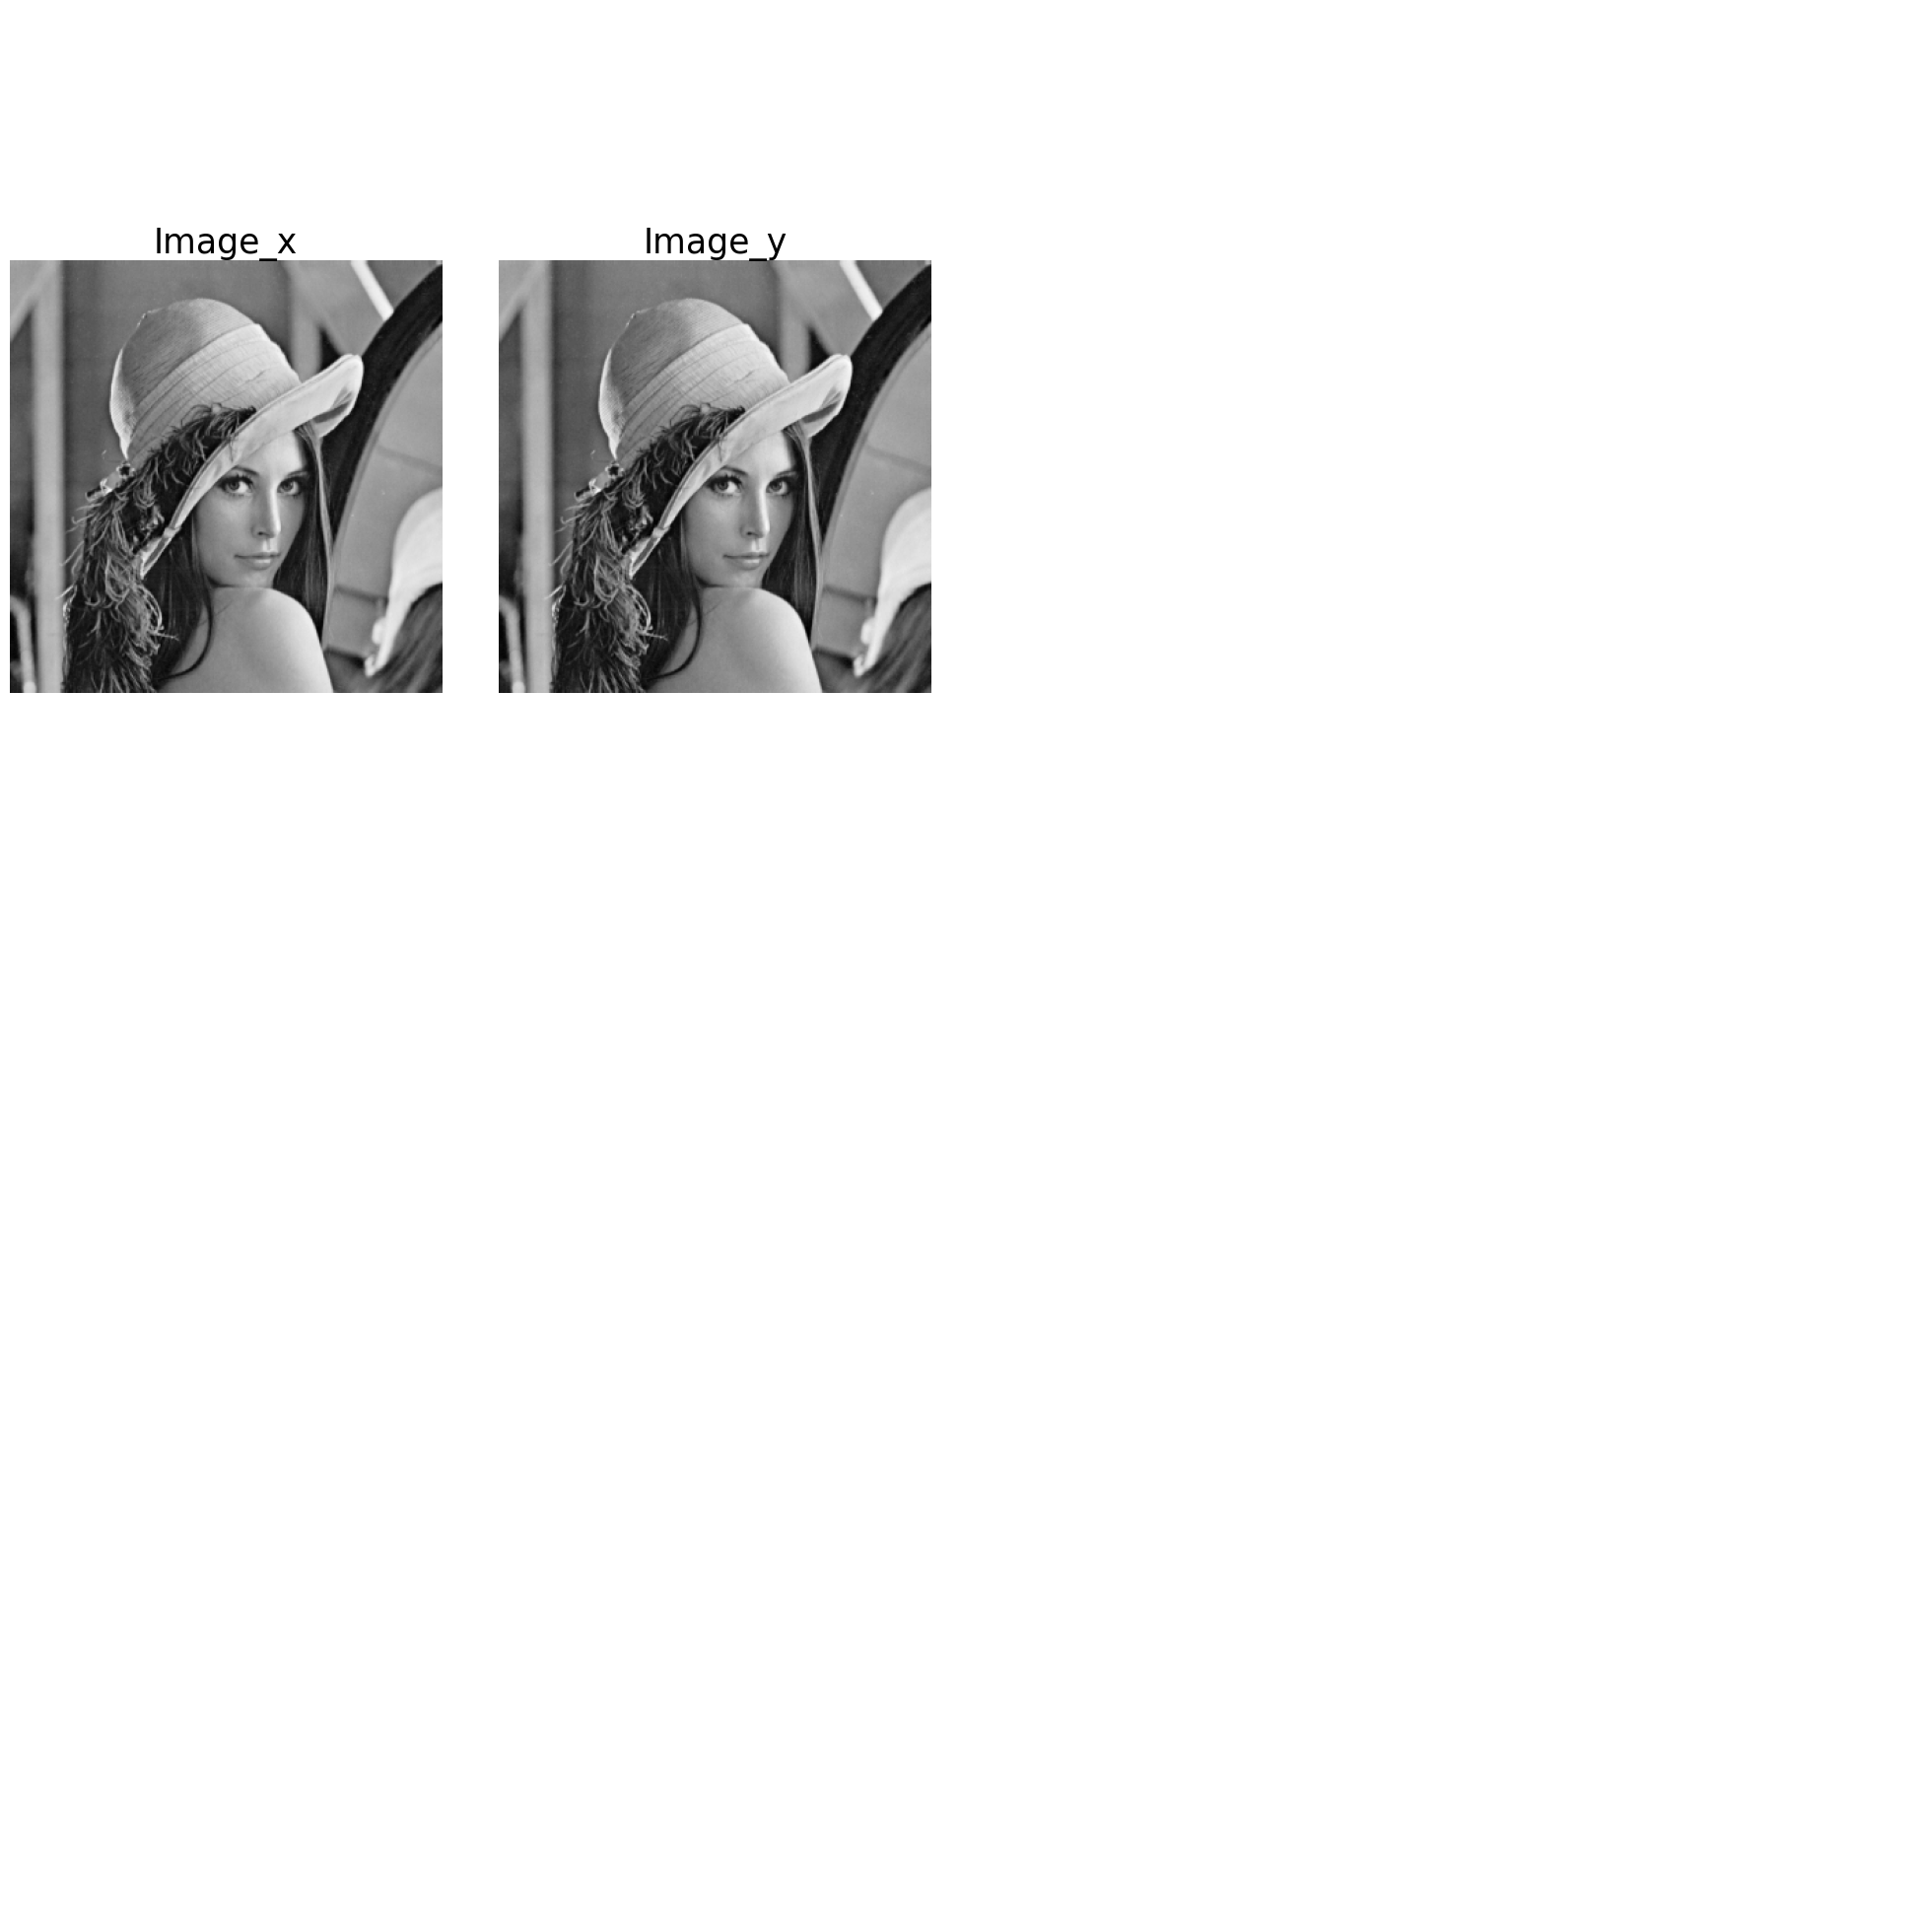

In [5]:
fig, ax = plt.subplots(2, 4, figsize=(20, 20))
fig.set_facecolor('white')
fig.tight_layout()
[b.axis('off') for a in ax for b in a ]

ax[0, 0].set_title("Image_x", fontsize=25)
ax[0, 0].imshow(img_x, cmap='gray')

ax[0, 1].set_title("Image_y", fontsize=25)
ax[0, 1].imshow(img_y, cmap='gray')